# Project 2: Ames Housing Data and Kaggle Challenge
---
## Table of Contents

1. [Introduction and Problem Statement](#1.-Introduction-and-Problem-Statement)
2. [Data Import and Cleaning](#2.-Data-Import-and-Cleaning)
3. [EDA](#3.-EDA)
4. [Pre-processing](#4.-Pre-processing)
5. [Modeling](#5.-Modeling)
6. [Inferential Visualizations](#6.-Inferential-Visualizations)
7. [Conclusion](#7.-Conclusion)
---

# 1. Introduction and Problem Statement

When it comes to real estate pricing, there is a famous old saying:
>"There are three things that matter in property: location, location, location."


With an increasing competitive housing market, there is a motivation to develop a housing price regression model for housing price prediction. Intuitively, the location of real estate is important, but the impact of factors on the pricing should not be understated. This project aims to produce a model can be used as a tool by real estate agents to aid their price evaluation of residential properties.

Our model will be built upon on the Ames Housing Dataset which contains the transactions between 2006 to 2010. The model will later be evaluated using  root mean squared error (RMSE) in the [Kaggle](https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge) platform. 

The data dictionary of the dataset can be found in this [link](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt). 

# 2. Data Import and Cleaning

### Importing libraries 
Aside from the standard libraries, libraries for linear regression and regularization tools were imported in anticipation for the linear regssion modeling.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import missingno as msno
import statsmodels.api as sm
import scipy.stats as stats
from datetime import datetime
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

In [2]:
#change df viewing preference 
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 85)

In [3]:
# change plt style
plt.style.use("ggplot")

### Dataset 
The Ames Housing Dataset was split into `train.csv` and `test.csv`. The following series of inspections revealed the followings:

For the training dataset, 
- 2051 rows and 81 columns 
- Some of the categorical data were incorrectly assigned as numerical data.

For the testing dataset, 
- 878 rows and 80 columns (note: the target variable "SalePrice" is not available)
- Some of the categorical data were incorrectly assigned as numerical data.)

For the purpose of this project, `SalePrice` will be the target variable, whereas the rest of the 80 features could be used as predictors for linear regression model.  

In [4]:
#importing dataset
house_train = pd.read_csv('../datasets/train.csv')
house_test = pd.read_csv('../datasets/test.csv')

In [5]:
#View train dataset
house_train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [6]:
#View test dataset
house_test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   
2        Gd            Av            GLQ           554            Unf   
3        TA            No            Unf             0            Unf   
4        TA            No            BLQ           609            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   
2             0          100            654    GasA         Ex           Y   
3             0          968            968    GasA         TA           Y   
4             0          785           1394    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0        

In [7]:
#View shape of datasets
print(house_train.shape)
print(house_test.shape)

(2051, 81)
(878, 80)


In [8]:
#view summary statistical information
display(house_train.describe())
display(house_train.describe())

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2051.000000  2.051000e+03  2051.000000   1721.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     69.055200   10065.208191   
std     843.980841  1.886918e+08    42.824223     23.260653    6742.488909   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     58.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     68.000000    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     80.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2051.000000   2051.000000  2051.000000     2051.000000   2029.000000   
mean       6.112140      5.562165  1971.708922     1984.190151     99.695909   
std        1.426271      1.104497    30.177889       21.036250    174.963129   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1953.500000     1964.500000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    161.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF   1st Flr SF  \
count   2050.000000   2050.000000  2050.000000    2050.000000  2051.000000   
mean     442.300488     47.959024   567.728293    1057.987805  1164.488055   
std      461.204124    165.000901   444.954786     449.410704   396.446923   
min        0.000000      0.000000     0.000000       0.000000   334.000000   
25%        0.000000      0.000000   220.000000     793.000000   879.500000   
50%      368.000000      0.000000   474.500000     994.500000  1093.000000   
75%      733.750000      0.000000   811.000000    1318.750000  1405.000000   
max     5644.000000   1474.000000  2336.000000    6110.000000  5095.000000   

        2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
count  2051.000000      2051.000000  2051.000000     2049.000000   
mean    329.329108         5.512921  1499.330083        0.427526   
std     425.671046        51.068870   500.447829        0.522673   
min       0.000000         0.000000   334.000000        0.000000   
25%       0.000000         0.000000  1129.000000        0.000000   
50%       0.000000         0.000000  1444.000000        0.000000   
75%     692.500000         0.000000  1728.500000        1.000000   
max    1862.000000      1064.000000  5642.000000        3.000000   

       Bsmt Half Bath    Full Bath    Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
count     2049.000000  2051.000000  2051.000000    2051.000000    2051.000000   
mean         0.063446     1.577279     0.371039       2.843491       1.042906   
std          0.251705     0.549279     0.501043       0.826618       0.209790   
min          0.000000     0.000000     0.000000       0.000000       0.000000   
25%          0.000000     1.000000     0.000000       2.000000       1.000000   
50%          0.000000     2.000000     0.000000       3.000000       1.000000   
75%          0.000000     2.000000     1.000000       3.000000       1.000000   
max          2.000000     4.000000     2.000000       8.000000       3.000000   

       TotRms AbvGrd   Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
count    2051.000000  2051.000000    1937.000000  2050.000000  2050.000000   
mean        6.435885     0.590931    1978.707796     1.776585   473.671707   
std         1.560225     0.638516      25.441094     0.764537   215.934561   
min         2.000000     0.000000    1895.000000     0.000000     0.000000   
25%         5.000000     0.000000    1961.000000     1.000000   319.000000   
50%         6.000000     1.000000    1980.000000     2.000000   480.000000   


Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2051.000000  2.051000e+03  2051.000000   1721.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     69.055200   10065.208191   
std     843.980841  1.886918e+08    42.824223     23.260653    6742.488909   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     58.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     68.000000    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     80.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2051.000000   2051.000000  2051.000000     2051.000000   2029.000000   
mean       6.112140      5.562165  1971.708922     1984.190151     99.695909   
std        1.426271      1.104497    30.177889       21.036250    174.963129   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1953.500000     1964.500000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    161.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF   1st Flr SF  \
count   2050.000000   2050.000000  2050.000000    2050.000000  2051.000000   
mean     442.300488     47.959024   567.728293    1057.987805  1164.488055   
std      461.204124    165.000901   444.954786     449.410704   396.446923   
min        0.000000      0.000000     0.000000       0.000000   334.000000   
25%        0.000000      0.000000   220.000000     793.000000   879.500000   
50%      368.000000      0.000000   474.500000     994.500000  1093.000000   
75%      733.750000      0.000000   811.000000    1318.750000  1405.000000   
max     5644.000000   1474.000000  2336.000000    6110.000000  5095.000000   

        2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
count  2051.000000      2051.000000  2051.000000     2049.000000   
mean    329.329108         5.512921  1499.330083        0.427526   
std     425.671046        51.068870   500.447829        0.522673   
min       0.000000         0.000000   334.000000        0.000000   
25%       0.000000         0.000000  1129.000000        0.000000   
50%       0.000000         0.000000  1444.000000        0.000000   
75%     692.500000         0.000000  1728.500000        1.000000   
max    1862.000000      1064.000000  5642.000000        3.000000   

       Bsmt Half Bath    Full Bath    Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
count     2049.000000  2051.000000  2051.000000    2051.000000    2051.000000   
mean         0.063446     1.577279     0.371039       2.843491       1.042906   
std          0.251705     0.549279     0.501043       0.826618       0.209790   
min          0.000000     0.000000     0.000000       0.000000       0.000000   
25%          0.000000     1.000000     0.000000       2.000000       1.000000   
50%          0.000000     2.000000     0.000000       3.000000       1.000000   
75%          0.000000     2.000000     1.000000       3.000000       1.000000   
max          2.000000     4.000000     2.000000       8.000000       3.000000   

       TotRms AbvGrd   Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
count    2051.000000  2051.000000    1937.000000  2050.000000  2050.000000   
mean        6.435885     0.590931    1978.707796     1.776585   473.671707   
std         1.560225     0.638516      25.441094     0.764537   215.934561   
min         2.000000     0.000000    1895.000000     0.000000     0.000000   
25%         5.000000     0.000000    1961.000000     1.000000   319.000000   
50%         6.000000     1.000000    1980.000000     2.000000   480.000000   


In [9]:
#modify attribute names to follow 
house_train.columns = house_train.columns.str.lower().str.replace(' ', '_')
house_test.columns = house_test.columns.str.lower().str.replace(' ', '_')

In [10]:
#view datatypes in train dataset
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [11]:
#view datatypes in test dataset
house_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    int64  
 1   pid              878 non-null    int64  
 2   ms_subclass      878 non-null    int64  
 3   ms_zoning        878 non-null    object 
 4   lot_frontage     718 non-null    float64
 5   lot_area         878 non-null    int64  
 6   street           878 non-null    object 
 7   alley            58 non-null     object 
 8   lot_shape        878 non-null    object 
 9   land_contour     878 non-null    object 
 10  utilities        878 non-null    object 
 11  lot_config       878 non-null    object 
 12  land_slope       878 non-null    object 
 13  neighborhood     878 non-null    object 
 14  condition_1      878 non-null    object 
 15  condition_2      878 non-null    object 
 16  bldg_type        878 non-null    object 
 17  house_style     

In [12]:
#Check for duplication 
print(house_test.duplicated().sum())
print(house_train.duplicated().sum())

0
0


### Missing values

There were multiple `NaN` values in the dataframes. Upon reviewing the data dictionary, majority of `NaN` values were are part of the expected value for the dataset. e.g. "None" if there is no fireplace in the residential unit. As such the datasets were re-imported with that in mind and would only assign `NaN` when there is a missing value instead. 

The number of `NaN` counts in the dataframes decreased from 13,993 to 719 after redefining that `NaN` would only be assigned to missing values in the dataset. 

 

In [13]:
#Total count for NaN values
print(house_train.isna().sum().sum())
print(house_test.isna().sum().sum())

9822
4171


In [14]:
#Check for missing values in original train dataset
[{column: house_train[column].isna().sum()} for column in house_train if house_train[column].isna().sum() != 0]

[{'lot_frontage': 330},
 {'alley': 1911},
 {'mas_vnr_type': 22},
 {'mas_vnr_area': 22},
 {'bsmt_qual': 55},
 {'bsmt_cond': 55},
 {'bsmt_exposure': 58},
 {'bsmtfin_type_1': 55},
 {'bsmtfin_sf_1': 1},
 {'bsmtfin_type_2': 56},
 {'bsmtfin_sf_2': 1},
 {'bsmt_unf_sf': 1},
 {'total_bsmt_sf': 1},
 {'bsmt_full_bath': 2},
 {'bsmt_half_bath': 2},
 {'fireplace_qu': 1000},
 {'garage_type': 113},
 {'garage_yr_blt': 114},
 {'garage_finish': 114},
 {'garage_cars': 1},
 {'garage_area': 1},
 {'garage_qual': 114},
 {'garage_cond': 114},
 {'pool_qc': 2042},
 {'fence': 1651},
 {'misc_feature': 1986}]

In [15]:
#Check for missing values in original test dataset
[{column: house_test[column].isna().sum()} for column in house_test if house_test[column].isna().sum() != 0]

[{'lot_frontage': 160},
 {'alley': 820},
 {'mas_vnr_type': 1},
 {'mas_vnr_area': 1},
 {'bsmt_qual': 25},
 {'bsmt_cond': 25},
 {'bsmt_exposure': 25},
 {'bsmtfin_type_1': 25},
 {'bsmtfin_type_2': 25},
 {'electrical': 1},
 {'fireplace_qu': 422},
 {'garage_type': 44},
 {'garage_yr_blt': 45},
 {'garage_finish': 45},
 {'garage_qual': 45},
 {'garage_cond': 45},
 {'pool_qc': 874},
 {'fence': 706},
 {'misc_feature': 837}]

In [16]:
#Re-import the dataset with consideration of None, NA, N/A as an expected value. 
house_train = pd.read_csv('../datasets/train.csv', keep_default_na= False, na_values='')
house_test = pd.read_csv('../datasets/test.csv', keep_default_na= False, na_values='')

#modify attribute names to follow 
house_train.columns = house_train.columns.str.lower().str.replace(' ', '_')
house_test.columns = house_test.columns.str.lower().str.replace(' ', '_')

In [17]:
#Re-evaluate total count for NaN values
print(house_train.isna().sum().sum())
print(house_test.isna().sum().sum())

510
209


In [18]:
#Re-evalutate for missing NaN in train dataset
[{column: house_train[column].isna().sum()} for column in house_train if house_train[column].isna().sum() != 0]

[{'lot_frontage': 330},
 {'mas_vnr_type': 22},
 {'mas_vnr_area': 22},
 {'bsmt_qual': 1},
 {'bsmt_cond': 1},
 {'bsmt_exposure': 4},
 {'bsmtfin_type_1': 1},
 {'bsmtfin_sf_1': 1},
 {'bsmtfin_type_2': 2},
 {'bsmtfin_sf_2': 1},
 {'bsmt_unf_sf': 1},
 {'total_bsmt_sf': 1},
 {'bsmt_full_bath': 2},
 {'bsmt_half_bath': 2},
 {'garage_yr_blt': 114},
 {'garage_finish': 1},
 {'garage_cars': 1},
 {'garage_area': 1},
 {'garage_qual': 1},
 {'garage_cond': 1}]

In [19]:
#Re-evalutate for missing NaN in test dataset
[{column: house_test[column].isna().sum()} for column in house_test if house_test[column].isna().sum() != 0]

[{'lot_frontage': 160},
 {'mas_vnr_type': 1},
 {'mas_vnr_area': 1},
 {'electrical': 1},
 {'garage_yr_blt': 45},
 {'garage_finish': 1}]

### Remaining missing values

Simple imputation:
- 460 observations for `lot_frontage` imputed using median values. 

- Observations Id 2237 and Id 1357 for `garage_yr_blt` imputed using median values

- Observation Id 1578 for `electrical` imputed using mode

- Observation Id 1357  `garage_finish` imputed using mode 

- Observation Id 2237 `garage_finish`, `garage_cars`, `garage_area`, `garage_qual`, `garage_cond` imputed with median values or mode

Logical imputation:

- For the remaining missing values, it was assumed that each of the value was meant to be "None" or "0" but was incorrectly left empty instead. 



In [20]:
#Simple impute (median) for lot_frontage
imput_median = SimpleImputer(strategy='median')
house_train['lot_frontage'] = imput_median.fit_transform(house_train.loc[:,['lot_frontage']])
house_test['lot_frontage'] = imput_median.fit_transform(house_test.loc[:,['lot_frontage']])

In [21]:
#Impute median for garage_yr_blt in id 2237 and 1357. The remainding observation will be filled with 0
house_train.loc[1712,'garage_yr_blt'] = house_train['garage_yr_blt'].median()
house_train['garage_yr_blt'].fillna(0, inplace=True)
house_test.loc[764, 'garage_yr_blt'] = house_test['garage_yr_blt'].median()
house_test['garage_yr_blt'].fillna(0, inplace=True)

In [22]:
# Simple impute (mode) for electircal 
imput_mode = SimpleImputer(strategy='most_frequent')
house_test['electrical'] = imput_mode.fit_transform(house_test.loc[:,['electrical']])

In [23]:
# Impute None for mas_vnr_type
house_train['mas_vnr_type'].fillna('None', inplace=True)
house_test['mas_vnr_type'].fillna('None', inplace=True)

In [24]:
# Impute 0 for mas_vnr_area
house_train['mas_vnr_area'].fillna(0, inplace=True)
house_test['mas_vnr_area'].fillna(0, inplace=True)

In [25]:
# Imput 'No Basement' for basement related predictors
attributes = ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2']
house_train[attributes] = house_train[attributes].fillna('NA')

#Imput 0 for basement related predictors 
attributes = ['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath' ]
house_train[attributes] = house_train[attributes].fillna(0)

In [26]:
# Impute Garage related predictors with median values 

house_train['garage_cars'] = imput_median.fit_transform(house_train.loc[:,['garage_cars']])
house_train['garage_area'] = imput_median.fit_transform(house_train.loc[:,['garage_area']])

In [27]:
# Impute Garage related predictors with mode 
attributes = ['garage_finish', 'garage_qual', 'garage_cond']
for attr in attributes:
    house_train[attr] = imput_mode.fit_transform(house_train.loc[:,[attr]])

In [28]:
# Simple impute (mode) for Garage Finish' 
house_test['garage_finish'] = imput_mode.fit_transform(house_test.loc[:,['garage_finish']])

In [29]:
# Verify for missing values 
print(house_test.isna().sum().sum())
print(house_train.isna().sum().sum())

0
0


### Correction to observation id 1699 in `garage_yr_blt` 

Observation Id 2261 has `garage_yr_blt` recorded as 2207. This would be impossible and likely as data entry error. To remediate the error, the year garage was built would assumed to be the same year as building was built.

In [30]:
house_train.loc[1699,'garage_yr_blt'] = house_train[house_train['garage_yr_blt'] == 2207]['year_built'].values

### Encode ordinal attributes
Based on the ranking in the data dictionary, the dataframes will be encoded accordingly.

In [31]:
# introduce ordinal dictionary data according to their ranking (based on the description in data dictionary)

ordinal_dic =  {
    'lot_shape': {
        'IR3': 0,
        'IR2': 1,
        'IR1': 2,
        'Reg': 3 
    }, 
    'utilities': {
        'ELO': 0,
        'NoSeWa': 1,
        'NoSewr': 2,
        'AllPub': 3
    },
    'land_slope': {
        'Gtl': 2,
        'Mod': 1,
        'Sev': 0
    },
    'exter_qual': {
        'Ex': 4,
        'Gd': 3,
        'TA': 2,
        'Fa': 1,
        'Po': 0
    }, 
    'exter_cond': {
        'Ex': 4,
        'Gd': 3,
        'TA': 2,
        'Fa': 1,
        'Po': 0
    },
    'bsmt_qual': {
        'Ex': 5,
        'Gd': 4,
        'TA': 3,
        'Fa': 2,
        'Po': 1,
        'NA': 0
    }, 
    'bsmt_exposure': {
        'Gd': 4,
        'Av': 3,
        'Mn': 2,
        'No': 1,
        'NA': 0
    },
    'bsmtfin_type_1': {
        'GLQ': 6,
        'ALQ': 5,
        'BLQ': 4,
        'Rec': 3,
        'LwQ': 2,
        'Unf': 1,
        'NA': 0
    }, 
    'bsmtfin_type_2' :{
        'GLQ': 6,
        'ALQ': 5,
        'BLQ': 4,
        'Rec': 3,
        'LwQ': 2,
        'Unf': 1,
        'NA': 0
    },
    'heating_qc': {
        'Ex': 4,
        'Gd': 3,
        'TA': 2,
        'Fa': 1,
        'Po': 0
    },
    'electrical': {
        'SBrkr': 4,
        'FuseA': 3,
        'FuseF': 2,
        'FuseP': 1,
        'Mix': 0
    },
    'kitchen_qual': {
        'Ex': 4,
        'Gd': 3,
        'TA': 2,
        'Fa': 1,
        'Po': 0
    },
    'fireplace_qu': {
        'Ex': 5,
        'Gd': 4,
        'TA': 3,
        'Fa': 2,
        'Po': 1,
        'NA': 0
    },
    'garage_qual': {
        'Ex': 5,
        'Gd': 4,
        'TA': 3,
        'Fa': 2,
        'Po': 1,
        'NA': 0
    },
    'garage_cond': {
        'Ex': 5,
        'Gd': 4,
        'TA': 3,
        'Fa': 2,
        'Po': 1,
        'NA': 0
    },
    'paved_drive': {
        'Y': 2,
        'P': 1,
        'N': 0 
    },
    'pool_qc': {
        'Ex': 4,
        'Gd': 3,
        'TA': 2,
        'Fa': 1,
        'NA': 0
    }, 
    'fence': {
        'GdPrv': 4,
        'MnPrv': 3,
        'GdWo': 2,
        'MnWw': 1,
        'NA': 0,
    }
}

In [32]:
ordinal_lst = [i for i in ordinal_dic.keys()]

In [33]:
# encode ordinal 
house_train.replace(ordinal_dic, inplace=True)
house_test.replace(ordinal_dic, inplace=True)

In [34]:
house_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    int64  
 1   pid              878 non-null    int64  
 2   ms_subclass      878 non-null    int64  
 3   ms_zoning        878 non-null    object 
 4   lot_frontage     878 non-null    float64
 5   lot_area         878 non-null    int64  
 6   street           878 non-null    object 
 7   alley            878 non-null    object 
 8   lot_shape        878 non-null    int64  
 9   land_contour     878 non-null    object 
 10  utilities        878 non-null    int64  
 11  lot_config       878 non-null    object 
 12  land_slope       878 non-null    int64  
 13  neighborhood     878 non-null    object 
 14  condition_1      878 non-null    object 
 15  condition_2      878 non-null    object 
 16  bldg_type        878 non-null    object 
 17  house_style     

# 3. EDA
The analysis would focus only on the the training dataset and would assume that the testing dataset has the same distribution.

In [35]:
#creating lists of features by numerical and categorical 
cat_features = house_train.select_dtypes(exclude='number').columns.to_list()
num_features = house_train.select_dtypes(include='number').columns.to_list()

### Graphing numerical features
The following section would explore the distribution of target and predictors variables .

In [36]:
#check length of features 
print(f'Number of numerical features: {len(num_features)}')
print(f'Number of categorical features: {len(cat_features)}')
print(f'Total features: {len(num_features) + len(cat_features)}')

Number of numerical features: 57
Number of categorical features: 24
Total features: 81


In [37]:
#create function for plotting
def plot_func(dataframe, attr, **kwarg):
    ''' Plot histogram, scatter plot, box plot, and qq plot in a figure.
    
    Note: 
    - For scatter plot, the attribute is plotted agaist saleprice.
    - Box plot is overlaid with strip plot to provide a sense of distribution of the data. 
    - There for categorical features, there will be no qq plot
    
    Parameters:
    data (dataframe): pandas dataframe 
    attr (list): list of dataframe column names to be plotted
    kwarg (string): accept attr: saleprice

    Returns:
    Nil'''
    row = len(attr)
    col = 3 if kwarg else 4
    figsize = (20, row*4)
    fig, ax = plt.subplots(nrows=row, ncols=col, figsize=figsize, constrained_layout=True) 
    for x in range(row):
            #scatter plot
            sns.histplot(x=attr[x], data=dataframe, ax=ax[x,0], color='tab:red')
            ax[x, 0].set_title(f'histogram: {attr[x]}')
            ax[x, 0].tick_params(labelrotation=90, axis='x')
            #scatter plot
            sns.scatterplot(x=attr[x], y='saleprice', data=dataframe, ax=ax[x,1])
            ax[x, 1].set_title(f'scatter plot: {attr[x]}')
            ax[x, 1].tick_params(labelrotation=90, axis='x')
            #box plot
            if kwarg:
                sns.boxplot(x=attr[x], y=kwarg['y_attr'], data=dataframe, ax=ax[x,2])
                sns.stripplot(x=attr[x], y=kwarg['y_attr'], data=dataframe, ax=ax[x,2], alpha= 0.2)
            else:
                sns.boxplot(x=attr[x], data=dataframe, ax=ax[x,2])
                sns.stripplot(x=attr[x], data=dataframe, ax=ax[x,2], alpha= 0.2)
            ax[x, 2].set_title(f'boxplot: {attr[x]}')
            ax[x, 2].tick_params(labelrotation=90, axis='x')
            #qq plot
            if kwarg:
                pass
            else:
                sm.qqplot(data= dataframe[attr[x]], line='45', fit=True, ax=ax[x,3])
                ax[x, 3].get_lines()[1].set_color('tab:blue')
                ax[x, 3].set_title(f'qqplot: {attr[x]}')
                ax[x, 3].tick_params(labelrotation=90, axis='x')
            
    plt.show()

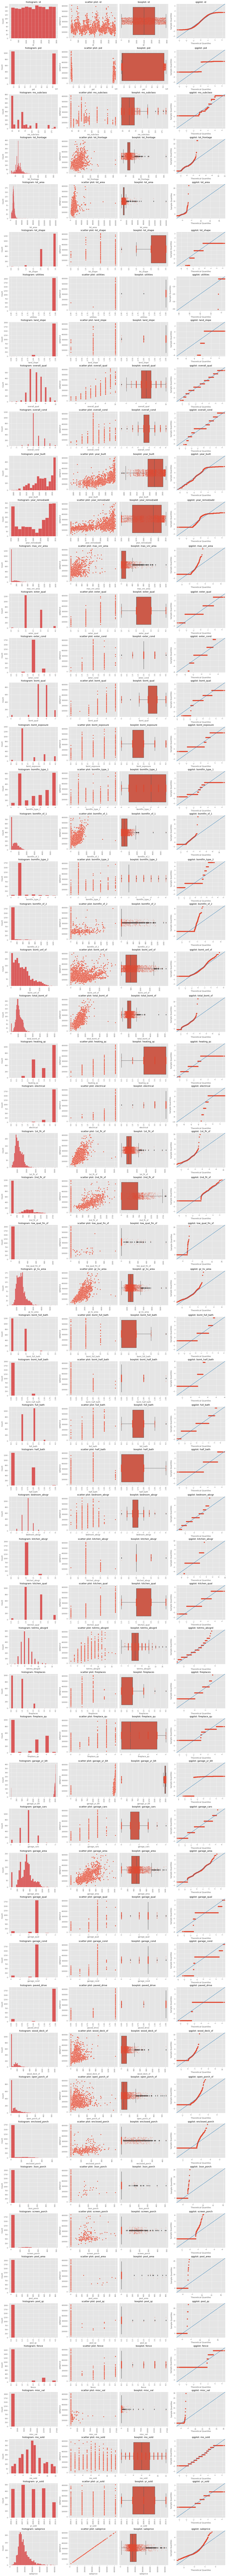

In [38]:
#plot numerical features
plot_func(house_train, num_features)

### Graphing categorical features

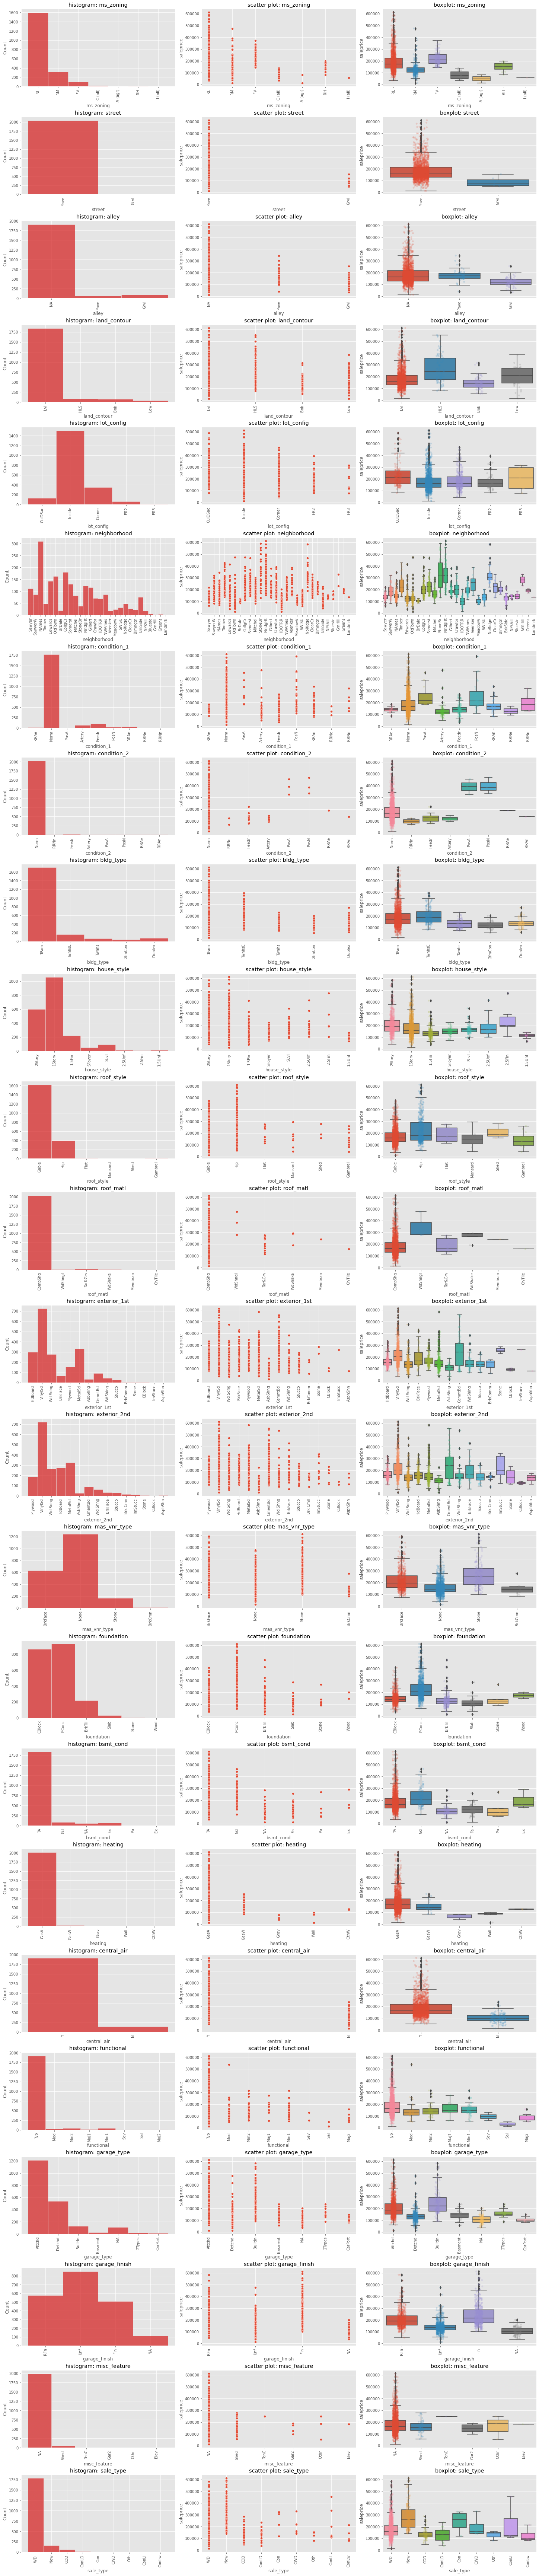

In [39]:
#plot categorical features
plot_func(house_train, cat_features, y_attr='saleprice')

### Heatmap

In [40]:
#one-hot encode categorical features
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(house_train[cat_features])
cat_df = pd.DataFrame(ohe.transform(house_train[cat_features]), columns=ohe.get_feature_names_out())

In [41]:
cat_df.shape

(2051, 178)

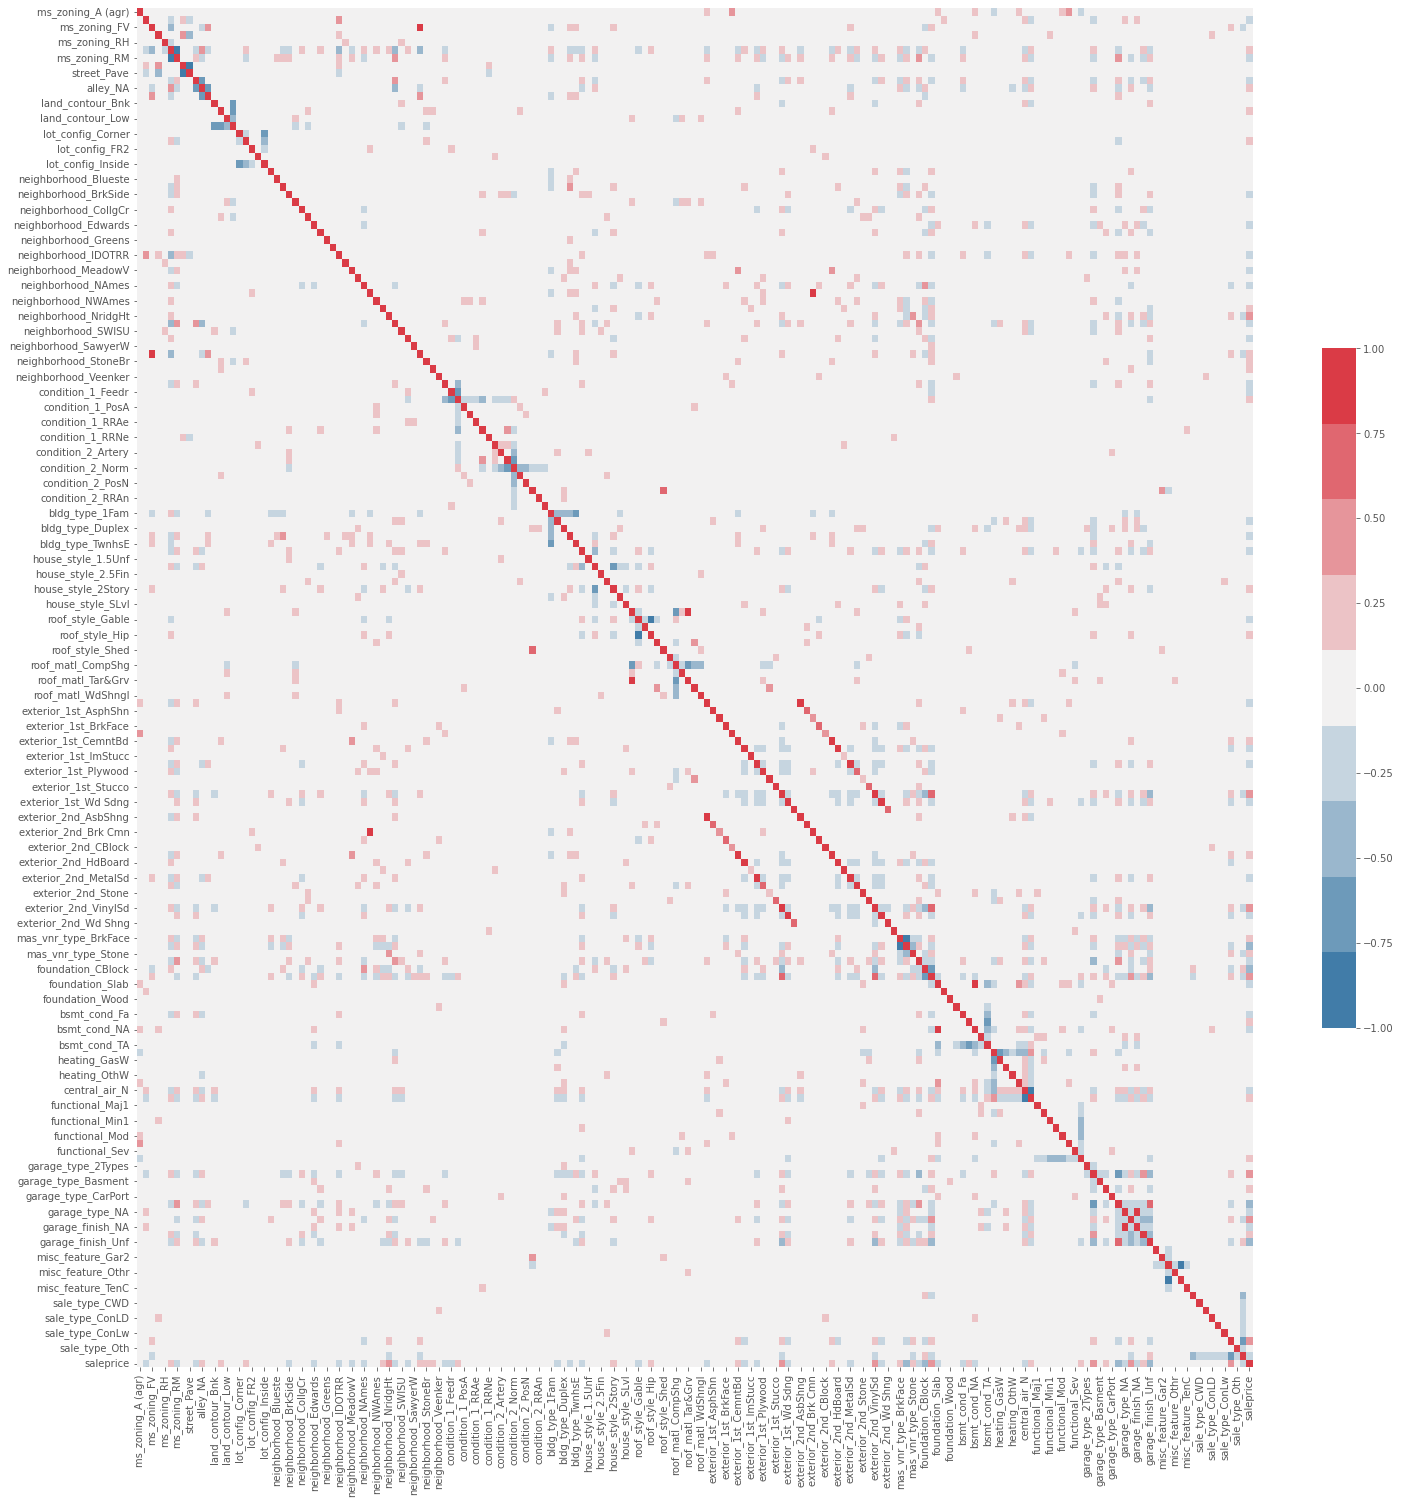

In [42]:
#plot heatmap for numerical features
plt.figure(figsize=(25,25))
sns.heatmap(pd.concat([cat_df, house_train['saleprice']], axis=1).corr(), cmap=sns.diverging_palette(240, 10, n=9),cbar_kws={"shrink": 0.5});

In [43]:
#print top attributes with negative correlation with saleprice
pd.concat([cat_df, house_train['saleprice']], axis=1).corr()['saleprice'].sort_values().head(15)

garage_finish_Unf      -0.432527
mas_vnr_type_None      -0.411170
garage_type_Detchd     -0.370344
foundation_CBlock      -0.355535
ms_zoning_RM           -0.281951
central_air_N          -0.277378
roof_style_Gable       -0.249329
garage_type_NA         -0.230990
garage_finish_NA       -0.230990
foundation_BrkTil      -0.229891
sale_type_WD           -0.212542
neighborhood_OldTown   -0.208371
house_style_1.5Fin     -0.195803
exterior_1st_Wd Sdng   -0.191734
neighborhood_NAmes     -0.189387
Name: saleprice, dtype: float64

In [44]:
#print top attributes with positive correlation with saleprice
pd.concat([cat_df, house_train['saleprice']], axis=1).corr()['saleprice'].sort_values(ascending=False).head(15)

saleprice               1.000000
foundation_PConc        0.529047
neighborhood_NridgHt    0.448647
garage_finish_Fin       0.422936
sale_type_New           0.358102
garage_type_Attchd      0.357879
exterior_1st_VinylSd    0.342146
exterior_2nd_VinylSd    0.337563
mas_vnr_type_Stone      0.310026
central_air_Y           0.277378
roof_style_Hip          0.265224
neighborhood_NoRidge    0.263395
mas_vnr_type_BrkFace    0.257901
neighborhood_StoneBr    0.256977
ms_zoning_RL            0.231468
Name: saleprice, dtype: float64

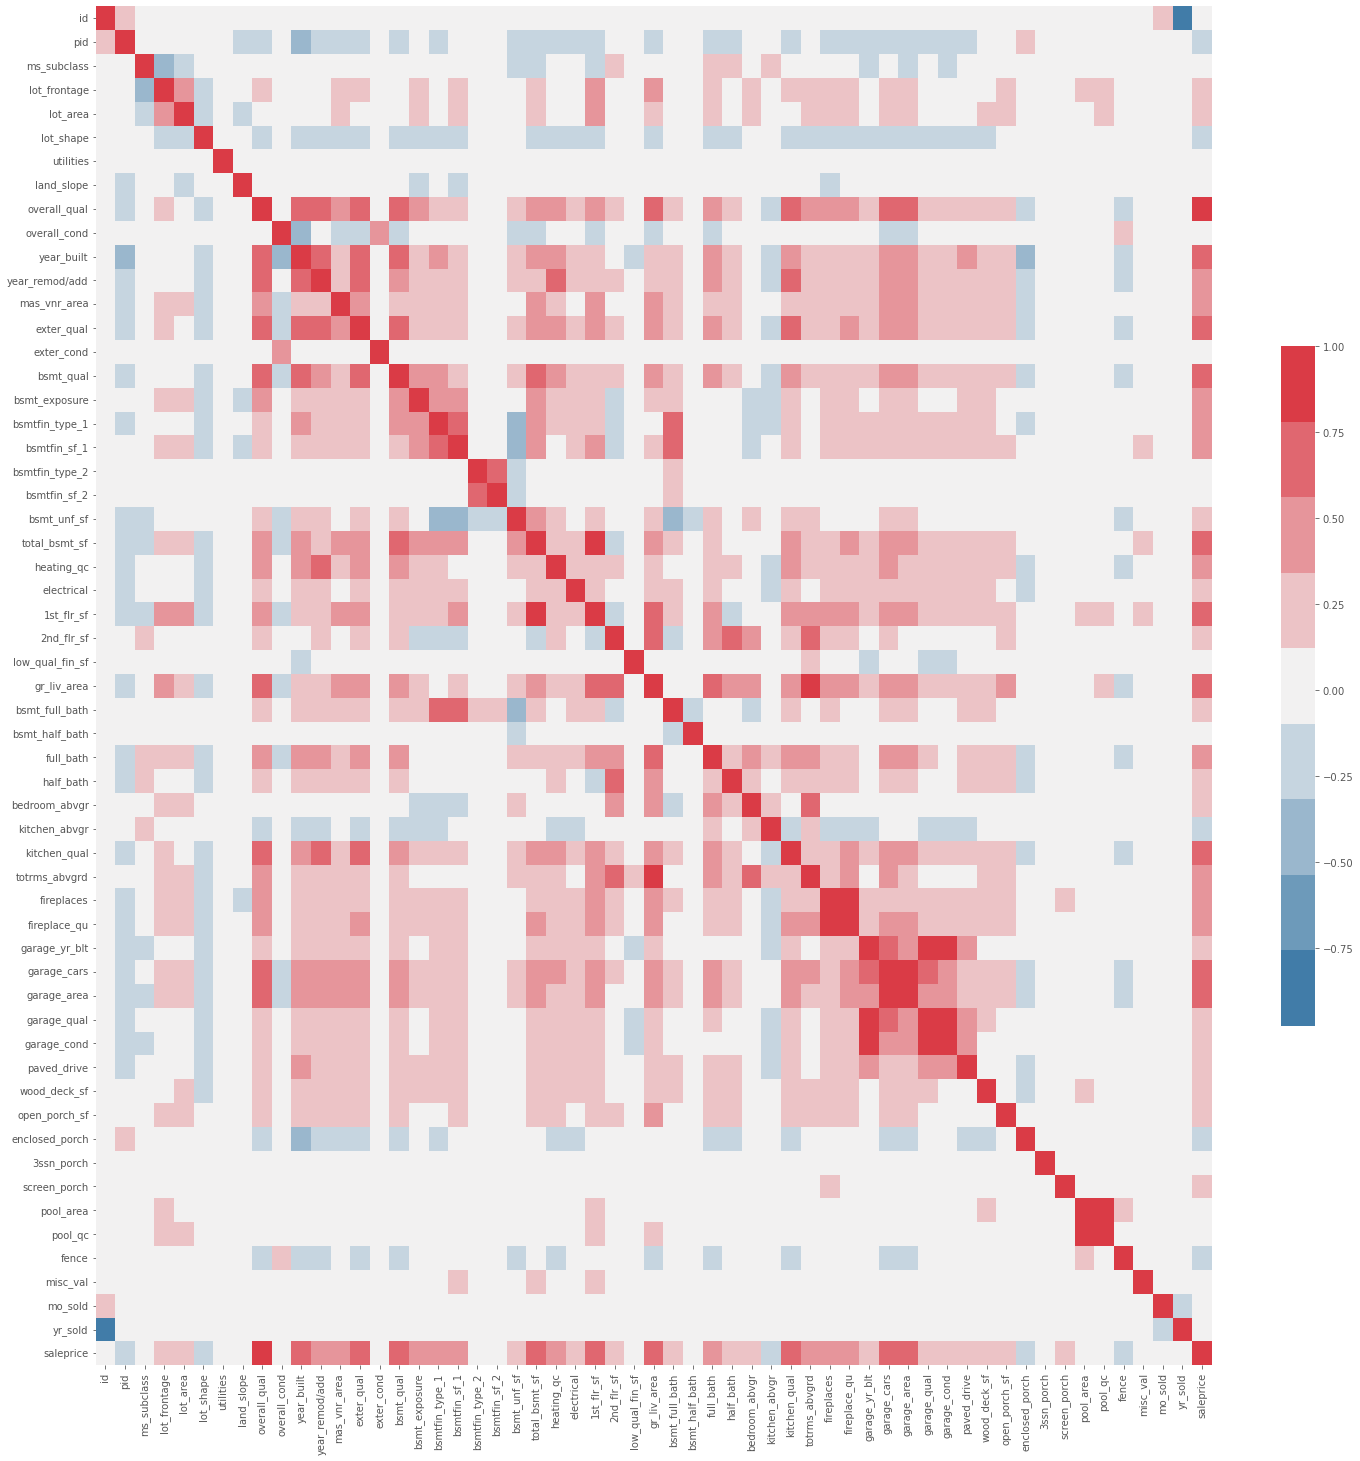

In [45]:
#plot heatmap for numerical features
plt.figure(figsize=(25,25))
sns.heatmap(house_train.corr(), cmap=sns.diverging_palette(240, 10, n=9), cbar_kws={"shrink": 0.5});

In [46]:
#print top attributes with negative correlation with saleprice
house_train.corr()['saleprice'].sort_values().head(15)

lot_shape         -0.294542
pid               -0.255052
fence             -0.159060
enclosed_porch    -0.135656
kitchen_abvgr     -0.125444
overall_cond      -0.097019
ms_subclass       -0.087335
land_slope        -0.057990
id                -0.051398
bsmt_half_bath    -0.045290
low_qual_fin_sf   -0.041594
yr_sold           -0.015203
misc_val          -0.007375
bsmtfin_type_2     0.014070
bsmtfin_sf_2       0.016432
Name: saleprice, dtype: float64

In [47]:
#print top attributes with positive correlation with saleprice
house_train.corr()['saleprice'].sort_values(ascending=False).head(20)

saleprice         1.000000
overall_qual      0.800207
exter_qual        0.712146
gr_liv_area       0.697038
kitchen_qual      0.692336
garage_area       0.650241
garage_cars       0.648128
total_bsmt_sf     0.629303
1st_flr_sf        0.618486
bsmt_qual         0.612188
year_built        0.571849
year_remod/add    0.550370
fireplace_qu      0.538925
full_bath         0.537969
totrms_abvgrd     0.504014
mas_vnr_area      0.503579
fireplaces        0.471093
heating_qc        0.458354
bsmt_exposure     0.424863
bsmtfin_sf_1      0.423856
Name: saleprice, dtype: float64

### Skewness 

Linear regression model works better when the data is normally distributed. From the plots above, most of the observations are skewed and not normally distributed. Using the scipy stats.skew function, the skewness level of each attribute will be computed. Generally,
- If skewness is less than -1 or greater than 1, the distribution is highly skewed.
- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
- If skewness is between -0.5 and 0.5, the distribution is approximately symmetric. 

In [128]:
#check skewness for numerical features
skew_df = pd.DataFrame(house_train[num_features].apply(lambda x: stats.skew(x)))
skew_df.reset_index(inplace=True)
skew_df.rename(columns={'index': 'attribute', 0:'skewness'}, inplace=True)

In [152]:
skew_df.T

0         1            2             3         4          5   \
attribute        id       pid  ms_subclass  lot_frontage  lot_area  lot_shape   
skewness  -0.011131  0.064289     1.379994      1.998329  9.198217  -1.185564   

                  6           7             8             9           10  \
attribute  utilities  land_slope  overall_qual  overall_cond  year_built   
skewness  -36.415216    -4.96758      0.148352      0.637699   -0.607468   

                       11            12          13          14         15  \
attribute  year_remod/add  mas_vnr_area  exter_qual  exter_cond  bsmt_qual   
skewness        -0.450875      2.609851     0.76364    1.237139  -1.270194   

                      16              17            18              19  \
attribute  bsmt_exposure  bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2   
skewness        1.114376        -0.16865      1.602203         3.12875   

                     20           21             22          23          24  \
attribute  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  heating_qc  electrical   
skewness       4.238037     0.907809        1.37972   -0.578762   -4.159345   

                   25          26               27           28  \
attribute  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area   
skewness     1.633949    0.873938        11.492876     1.280554   

                       29              30         31         32  \
attribute  bsmt_full_bath  bsmt_half_bath  full_bath  half_bath   
skewness         0.631944        3.946384   0.106835   0.742377   

                      33             34            35             36  \
attribute  bedroom_abvgr  kitchen_abvgr  kitchen_qual  totrms_abvgrd   
skewness        0.370209       4.345094      0.452945       0.843323   

                   37            38             39           40           41  \
attribute  fireplaces  fireplace_qu  garage_yr_blt  garage_cars  garage_area   
skewness     0.725507      0.179684      -3.881115     -0.22811     0.199101   

                    42           43           44            45             46  \
attribute  garage_qual  garage_cond  paved_drive  wood_deck_sf  open_porch_sf   
skewness     -3.248747    -3.401493    -3.015029      2.015606       2.296341   

                       47          48            49         50         51  \
attribute  enclosed_porch  3ssn_porch  screen_porch  pool_area    pool_qc   
skewness         2.862817    11.81855      3.856287  16.688012  17.541242   

                 52         53       54        55         56  
attribute     fence   misc_val  mo_sold   yr_sold  saleprice  
skewness   1.767815  20.642287  0.21188  0.154142   1.556412

In [150]:
#save list of attributes with moderate skewness (e.g. magnitude > 0.5)
skew_list = skew_df[abs(skew_df['skewness'])>0.5]['attribute'].values.tolist()     

### Insights from EDA

Issues that could impact linear regression model: 
- Target variable, `saleprice`, is not normally distributed and is right skewed as showed in the histogram. The mean is greater than the median, and intuitively there are some high value transactions that skewed the distribution. A log transformation is required to make the `saleprice` distribution more gaussian-like.

- From the box plots, several features have outliers. Also mentioned in the [data dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt), there were outliers with > 4000 square feet and they are recommended to be removed. Linear regression model is known to be sensitive to outliers. As such, outliers for the selected features should removed.  

- There are some categorical attributes which are poorly distributed and most, if not all, of the observations have the same output. e.g. `pool_area`, `fence`, `misc_feature`. These attributes are poor predictors for our target variable and should not be chosen for linear regression. 

Features selected:
- From the correlation data and heatmap, the following attributes were chosen as the predictors as they have at least a moderate correlation score of 0.42:
    1.	overall_qual                 
    2.	exter_qual                   
    3.	gr_liv_area                  
    4.	kitchen_qual                 
    5.	garage_area                  
    6.	garage_cars                  
    7.	total_bsmt_sf                
    8.	1st_flr_sf                   
    9.	bsmt_qual                    
    10.	year_built                   
    11.	year_remod/add              
    12.	fireplace_qu
    13.	full_bath
    14.	totrms_abvgrd
    15.	mas_vnr_area      
    16.	fireplaces        
    17.	heating_qc        
    18.	bsmt_exposure     
    19.	bsmtfin_sf_1
    20.	foundation_PConc  
    21.	neighborhood_NridgHt
    22.	garage_finish_Unf 

# 4. Pre-processing

### Selection of features

In [48]:
#defining list of selected predictors
selected_num_lst = ['overall_qual', 'exter_qual', 'gr_liv_area', 'kitchen_qual', 'garage_area', 'garage_cars', 
                    'total_bsmt_sf', '1st_flr_sf', 'bsmt_qual', 'year_built', 'year_remod/add', 'fireplace_qu', 
                    'full_bath', 'totrms_abvgrd', 'mas_vnr_area', 'fireplaces', 'heating_qc', 'bsmt_exposure', 
                    'bsmtfin_sf_1']
selected_cat_lst = ['foundation_PConc', 'neighborhood_NridgHt', 'garage_finish_Unf']

#defining new dataframe for selected predictors
house_train_selec = pd.concat([house_train[selected_num_lst], cat_df[selected_cat_lst], house_train['saleprice']], axis=1)

### Removing outliers 

In [49]:
# manually remove outliers
house_train_selec['gr_liv_area'] = house_train_selec['gr_liv_area'].apply(lambda x: np.nan if x > 4000 else x)
house_train_selec.dropna(inplace=True)

In [50]:
#verify shape of the new dataframe
house_train_selec.shape

(2049, 23)

In [51]:
# for attr in selected_lst:
#     # calculate interquartile range
#     q25, q75 = np.percentile(house_train_selec[attr], 25), np.percentile(house_train_selec[attr], 75)
#     iqr = q75 - q25
#     lower, upper = q25 - (iqr*1.5), q75 + (iqr*1.5)
#     #remove outliers 
#     house_train_selec[attr] = house_train_selec[attr].apply(lambda x: np.nan if x < lower or x > upper else x)
# house_train_selec.dropna(inplace=True)

In [52]:
# calculate interquartile range
# q25, q75 = np.percentile(house_train['overall_qual'], 25), np.percentile(house_train['overall_qual'], 75)
# iqr = q75 - q25
# lower, upper = q25 - (iqr*1.5), q75 + (iqr*1.5)
#remove outliers 
# house_train['Gr Liv Area'] = house_train['Gr Liv Area'].apply(lambda x: np.nan if x < lower or x > upper else x)
# house_train.dropna(inplace=True)

### Log transform 
Applying log transformation to correct the skew distribution

In [53]:
#apply log transform to saleprice
house_train_selec['saleprice'] = np.log1p(house_train_selec['saleprice'])

In [56]:
#check skewness 

stats.skew(house_train_selec['saleprice'])

-0.14642558528973415

In [57]:
stats.skew(house_train['saleprice'])

1.5564120909746169

In [58]:
house_train[num_features].apply(lambda x: stats.skew(x))

id              -0.011131
pid              0.064289
ms_subclass      1.379994
lot_frontage     1.998329
lot_area         9.198217
                  ...    
fence            1.767815
misc_val        20.642287
mo_sold          0.211880
yr_sold          0.154142
saleprice        1.556412
Length: 57, dtype: float64

In [59]:
# temp2 = pd.concat([temp_df, house.apply(lambda x: stats.skew(x))], axis=1)

In [60]:
# temp2[temp2['skew']>0.5]

In [61]:
# temp_df[temp_df['skew']> 0.5]

In [62]:
# temp_df['skew'] = house_train[num_features].apply(lambda x: stats.skew(x))
# temp_df[temp_df['skew']> 0.5]

In [63]:
# temp_df[temp_df['skew']> 0.5].index.to_list()

In [64]:
# house = house_train[temp_df[temp_df['skew']> 0.5].index.to_list()].apply(lambda x: np.log1p(x))

In [65]:
# house

In [66]:
# plot_hist(7, 5, house_train, temp_df[temp_df['skew']> 0.5].index.to_list())

In [67]:
# plot_hist(7, 5, house, temp_df[temp_df['skew']> 0.5].index.to_list())

### Data wrangling

In [68]:
#apply one-hot-encoding to test dataframe
cat_df_test = pd.DataFrame(ohe.transform(house_test[cat_features]), columns=ohe.get_feature_names_out())
#create a test dataframe with the selected predictors 
house_test_selec = pd.concat([house_test[selected_num_lst], cat_df_test[selected_cat_lst]], axis=1)

In [69]:
#verify the shapes of the dataframes
print(f'shape of the training df: {house_train_selec.shape}')
print(f'shape of the testing df: {house_test_selec.shape}')

shape of the training df: (2049, 23)
shape of the testing df: (878, 22)


In [70]:
#create target vector y
y_train_validate = house_train_selec['saleprice']
print(f'shape of the target vector: {y_train_validate.shape}')

shape of the target vector: (2049,)


In [71]:
#create feature matrix for training & validation
X_num_train_validate = house_train_selec.drop(columns='saleprice')[selected_num_lst]
X_cat_train_validate = house_train_selec.drop(columns='saleprice')[selected_cat_lst]
#create feature matrix for testing
X_num_test = house_test_selec[selected_num_lst]
X_cat_test = house_test_selec[selected_cat_lst]

In [72]:
#verify the shapes of the dataframes
print(f'shape of the training matrix: {X_cat_train_validate.shape, X_num_train_validate.shape}')
print(f'shape of the testing matrix: {X_cat_test.shape, X_num_test.shape}')

shape of the training matrix: ((2049, 3), (2049, 19))
shape of the testing matrix: ((878, 3), (878, 19))


### Apply StandardScaler()

In [73]:
#apply standardization to numerical dataframe
ss = StandardScaler()
X_num_train_validate = ss.fit_transform(X_num_train_validate)
X_num_test = ss.fit_transform(X_num_test)

In [74]:
#verify the shapes of the array
print(f'shape of the training array: {X_num_train_validate.shape}')
print(f'shape of the testing arrary: {X_num_test.shape}')

shape of the training array: (2049, 19)
shape of the testing arrary: (878, 19)


### Merge categorical and numeric feature matrix

In [75]:
#Assigning numerical feature matrix to dataframe
X_num_train_validate = pd.DataFrame(X_num_train_validate, columns=ss.get_feature_names_out())
X_num_test = pd.DataFrame(X_num_test, columns=ss.get_feature_names_out())
#reset index
X_num_train_validate.reset_index(inplace=True, drop=True)
X_cat_train_validate.reset_index(inplace=True, drop=True)
#merge categorical and numerical feature matrix 
X_train_validate = pd.concat([X_cat_train_validate, X_num_train_validate], axis=1)
X_test = pd.concat([X_cat_test, X_num_test], axis=1)

In [76]:
#verify the shapes of the dataframes
print(f'shape of the target vector: {y_train_validate.shape}')
print(f'shape of the training matrix: {X_train_validate.shape}')
print(f'shape of the testing matrix: {X_test.shape}')

shape of the target vector: (2049,)
shape of the training matrix: (2049, 22)
shape of the testing matrix: (878, 22)


### Train-Test Split

In [77]:
#apply train_test_split() on the testing matrix
X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size=0.2, random_state=52)

In [78]:
print(f'shape of the training matrix X: {X_train.shape}')
print(f'shape of the training target vector y: {y_train.shape}')
print(f'shape of the validation matrix X: {X_validate.shape}')
print(f'shape of the validation target vector y: {y_validate.shape}')

shape of the training matrix X: (1639, 22)
shape of the training target vector y: (1639,)
shape of the validation matrix X: (410, 22)
shape of the validation target vector y: (410,)


# 5. Modeling

### Cross validation

#### Linear Regression

In [79]:
lr = LinearRegression()
lr_score_r2 = cross_val_score(lr, X_train, y_train, cv=10, scoring='r2').mean()
lr_score_rmse = cross_val_score(lr, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error').mean()
print(f'r2 score: {lr_score_r2}')
print(f'rmse score: {lr_score_rmse}')

r2 score: 0.8696788687394754
rmse score: -0.1495905121600439


In [80]:
-cross_val_score(lr, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error').mean()

0.1495905121600439

In [81]:
(-cross_val_score(lr, X_train, y_train, cv=10, scoring='neg_mean_squared_error').mean())**0

1.0

#### Ridge

In [82]:
ridge_alphas = np.logspace(0, 5, 200)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
ridge = Ridge(alpha= optimal_ridge.alpha_)
ridge_score_r2 = cross_val_score(ridge, X_train, y_train, cv=10, scoring='r2').mean()
ridge_score_rmse = cross_val_score(ridge, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error').mean()
print(f'r2 score: {ridge_score_r2}')
print(f'rmse score: {ridge_score_rmse}')

r2 score: 0.8699416671021872
rmse score: -0.14946495744024085


#### remove

In [83]:
# optimal_ridge2 = RidgeCV(alphas=np.logspace(0,5,200), cv=10, scoring='neg_root_mean_squared_error')
# optimal_ridge2.fit(X_train, y_train)
# ridge = Ridge(alpha= optimal_ridge2.alpha_)
# ridge_score_r2 = cross_val_score(ridge, X_train, y_train, cv=10, scoring='r2').mean()
# ridge_score_rmse = cross_val_score(ridge, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error').mean()
# print(f'r2 score: {ridge_score_r2}')
# print(f'rmse score: {ridge_score_rmse}')

In [84]:
# optimal_ridge2.coef_

In [85]:
# optimal_ridge2.feature_names_in_

#### Lasso

In [86]:
optimal_lasso = LassoCV(n_alphas=500, cv=10)
optimal_lasso.fit(X_train, y_train)
alpha = optimal_lasso.alpha_
lasso = Lasso(alpha=alpha)
lasso_score_r2 = cross_val_score(lasso, X_train, y_train, cv=10, scoring='r2').mean()
lasso_score_rmse = cross_val_score(lasso, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error').mean()
print(f'r2 score: {lasso_score_r2}')
print(f'rmse score: {lasso_score_rmse}')

r2 score: 0.870150312359319
rmse score: -0.1493595846026899


#### remove

In [87]:
# def rmse_cv(model):
#     rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 10))
#     return(rmse)

In [88]:
# model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

In [89]:
# rmse_cv(model_lasso).mean()

In [90]:
# coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [91]:
# coef

In [92]:
# print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [93]:
# imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])

In [94]:
# plt.figure(figsize=(8,10))
# imp_coef.plot(kind = "barh")
# plt.title("Coefficients in the Lasso Model")

#### Elasticnet

In [95]:
l1_ratio = np.linspace(0.01, 1, 25)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratio, n_alphas=100, cv=10)
optimal_enet.fit(X_train,y_train)
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)
enet_score_r2 = cross_val_score(enet, X_train, y_train, cv=10, scoring='r2').mean()
enet_score_rmse = cross_val_score(enet, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error').mean()
print(f'r2 score: {lasso_score_r2}')
print(f'rmse score: {lasso_score_rmse}')

r2 score: 0.870150312359319
rmse score: -0.1493595846026899


### Validation

### to review

In [96]:
ridge = Ridge(alpha= optimal_ridge.alpha_)
ridge.fit(X_validate, y_validate)

Ridge(alpha=32.17641750250737)

In [97]:
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso.fit(X_validate, y_validate)

Lasso(alpha=0.003379311048755599)

In [98]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)
enet.fit(X_validate, y_validate)

ElasticNet(alpha=0.016177413441570174, l1_ratio=0.17500000000000002)

In [99]:
y_pred = enet.predict(X_validate)

In [100]:
r2_score(y_validate, y_pred)

0.9064919086525203

In [101]:
mean_squared_error(y_validate, y_pred, squared=False)

0.11762064105263557

In [102]:
np.exp(0.12119461570806678)

1.1288445818786816

In [103]:
mean_squared_error(np.exp(y_validate), np.exp(y_pred), squared=False)

21191.050481674396

In [104]:
residual = y_validate - y_pred

<AxesSubplot:xlabel='saleprice', ylabel='saleprice'>

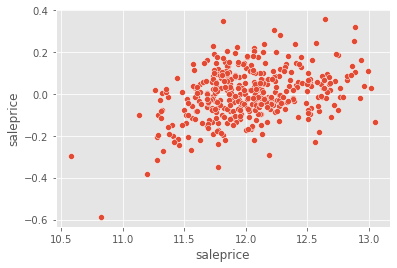

In [105]:
sns.scatterplot(x=y_validate, y=residual)

<AxesSubplot:xlabel='saleprice'>

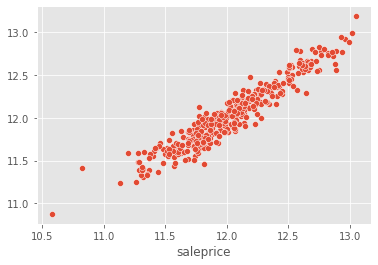

In [106]:
sns.scatterplot(x=y_validate, y=y_pred)

In [107]:
y_pred_test = pd.DataFrame(enet.predict(X_test), columns={'saleprice'})

In [108]:
y_pred_test = np.exp(y_pred_test)

In [109]:
y_pred_test.head()

saleprice
0  126468.109031
1  168574.607357
2  211781.834989
3  119030.609023
4  174442.925620

In [ ]:
output = pd.concat([house_test['id'], y_pred_test], axis=1)
#output.to_csv('kaggle_{}.csv'.format(datetime.now().strftime("%Y%m%d_%H%M%S")), index=False)

In [ ]:
#!kaggle competitions submit -c dsi-us-11-project-2-regression-challenge -f kaggle_20211230_120352.csv -m "test"

# 6. Inferential Visualizations

# 7. Conclusion